In [40]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
from run import run_backtest
from qamsi.cov_estimators.cov_estimators import CovEstimators

ESTIMATOR = CovEstimators.STATIC_FACTOR_MODEL.value(
    factor_cov_estimator=CovEstimators.GBM_PREDICTOR.value(),
    # factor_cov_estimator=CovEstimators.HISTORICAL.value(),
    residual_cov_estimator=CovEstimators.HISTORICAL.value(),
)
VERBOSE = True
PLOT_PROGRESS = False

Train data on 2004-03-23 00:00:00 to 2022-03-31 00:00:00
Test data on 2022-04-01 00:00:00 to 2024-12-31 00:00:00
Num Train Iterations: 4539
Running backtest...


4287it [01:33, 45.75it/s]


Running backtest...


4287it [00:31, 137.15it/s]


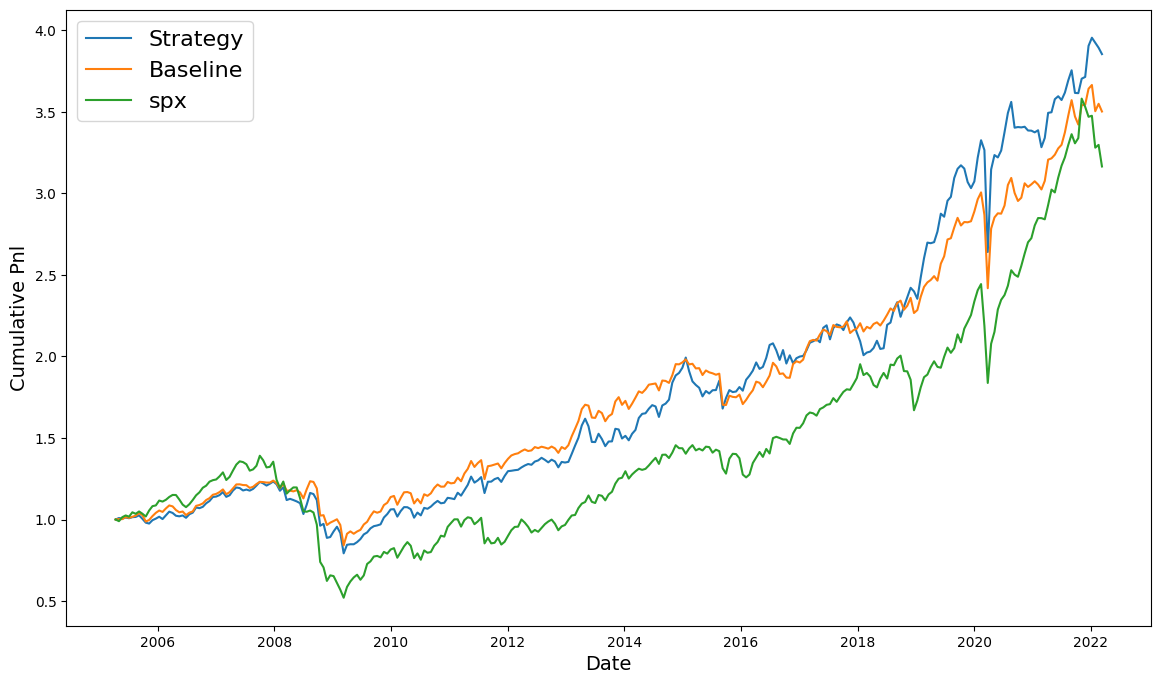

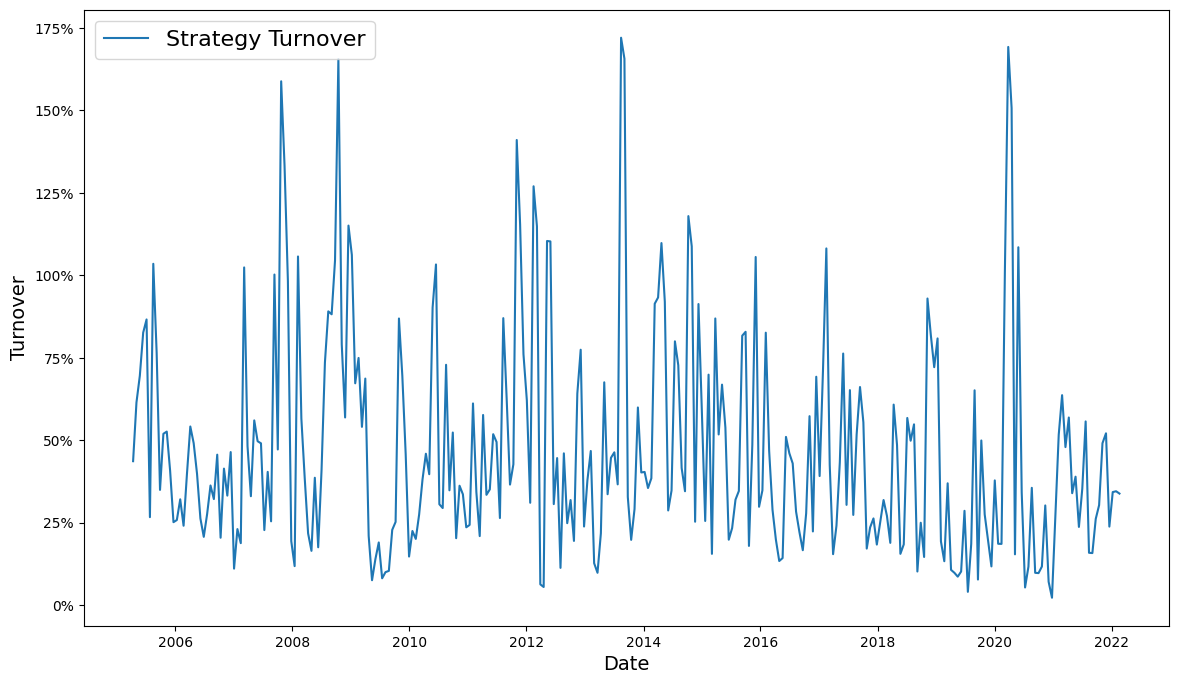

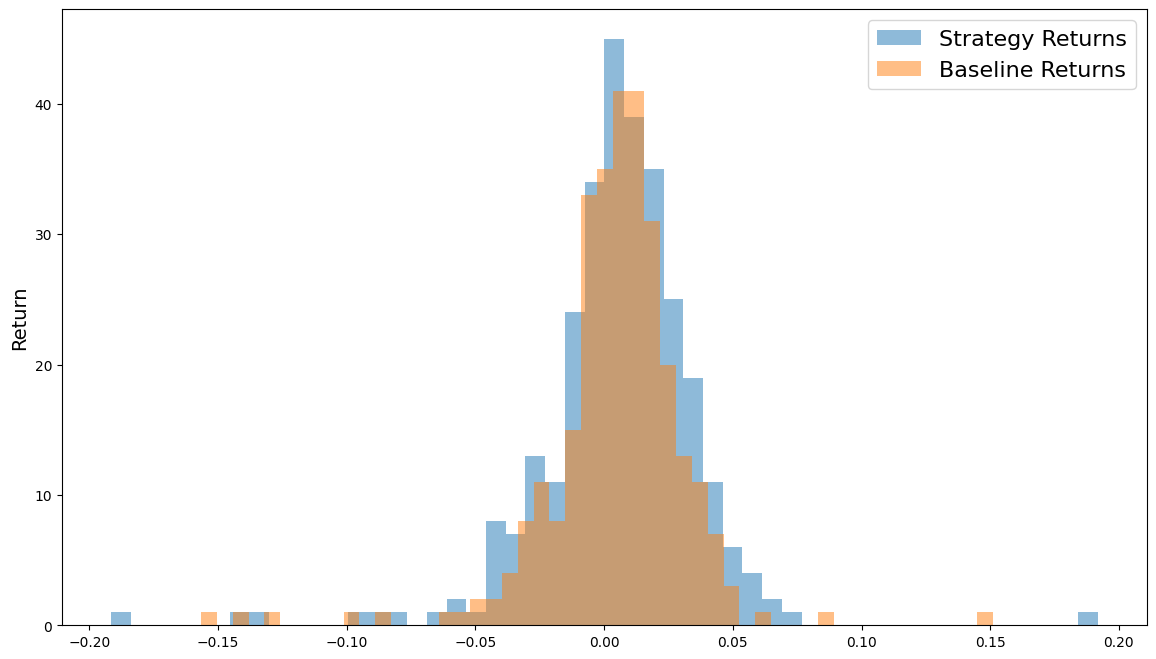

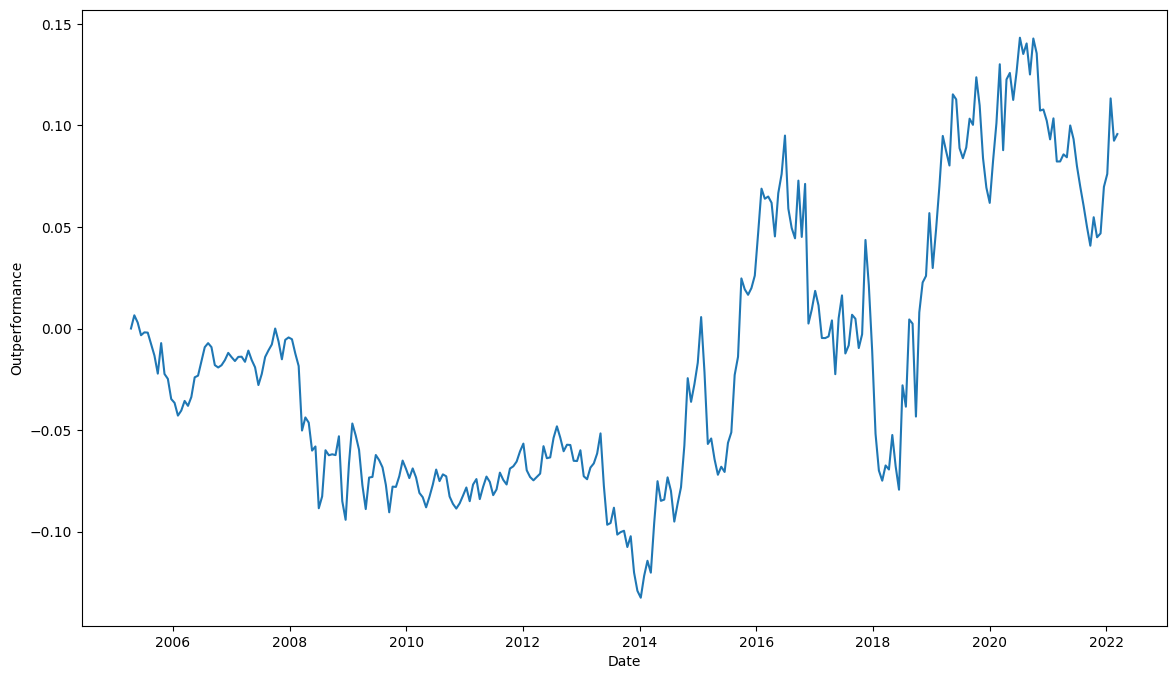

In [42]:
run_result = run_backtest(ESTIMATOR, verbose=VERBOSE, plot_progress=PLOT_PROGRESS)

In [43]:
run_result.strategy

StrategyStatistics:
* final_nav = 3.913527
* final_rf = 1.624537
* mean = 0.081803
* std = 0.131371
* skew = -0.965832
* kurtosis = 10.604631
* max_dd = -0.244434
* sharpe = 0.406833
* alpha_buy_hold = 0.042513
* tracking_error_buy_hold = 0.131177
* ir_buy_hold = 0.324085
* factor_loadings = {'spx': 0.5018382969954702}
* alpha_benchmark = 0.029786
* alpha_benchmark_pvalue = 0.182472
* tracking_error_benchmark = 0.103942
* ir_benchmark = 0.286558
* ttest_pval = 0.236889
* levene_pval = 0.010597
* timing_ability_coef = -0.281298
* timing_ability_pval = 0.014103

In [44]:
run_result.baseline

StrategyStatistics:
* final_nav = 3.499845
* final_rf = 1.624537
* mean = 0.074860
* std = 0.114335
* skew = -1.316412
* kurtosis = 10.334927
* max_dd = -0.222396
* sharpe = 0.406730
* alpha_buy_hold = 0.035570
* tracking_error_buy_hold = 0.098699
* ir_buy_hold = 0.360390
* factor_loadings = {'spx': 0.5663409624877651}
* alpha_benchmark = 0.020276
* alpha_benchmark_pvalue = 0.200642
* tracking_error_benchmark = 0.069804
* ir_benchmark = 0.290479
* ttest_pval = 0.283410
* levene_pval = 0.000043
* timing_ability_coef = -0.115694
* timing_ability_pval = 0.134341